# Predicting the Churn Dataset 


## Problem Statement:

Predicting Customer Churn. Churn prediction means detecting which customers are likely to leave a service or to cancel a subscription to a service

Maintaining current customers is very important as acquiring new customers is very expensive compared to maintaining current customers. So, to understand what rate the customers are leaving Churn is calculated. The target variable in the dataset is 'Churn'. 

**The data set includes information about:**

***Customers*** who left within the last month – the column is called Churn

**Services** that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

**Customer account information** – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

**Demographic info about customers** – gender, age range, and if they have partners and dependents


## Features :


CustomerID 

Gender

Senior Citizen

Partner Dependents

Tenure Phone

Service Multiple Lines

Internet Service

Online Security

Online Backup

Device Protection

Tech Support

Streaming TV

Streaming Movies

Contract

Paperless Billing

Payment Method

Monthly Charges

Total Charges

Churn 

# Importing the Libraries


Churn is a one of the biggest problem in  the telecom industry. Research has shown that the average monthly churn rate among the top 4 wireless carriers in the US is 1.9% - 2%. 

In [119]:
# Import the necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt


# Read the Data and Exploration

In [120]:
# Load the tarin and test data
df_train = pd.read_csv('/content/Churn_Train.csv')
df_test = pd.read_csv('/content/Churn_Test.csv')

In [121]:
df_train.head() ### To display the first few rows of the dataframe:

CustomerID  Gender  Senior Citizen Partner Dependents  Tenure  \
0  7590-VHVEG  Female               0     Yes         No       1   
1  5575-GNVDE    Male               0      No         No      34   
2  3668-QPYBK    Male               0      No         No       2   
3  7795-CFOCW    Male               0      No         No      45   
4  9237-HQITU  Female               0      No         No       2   

  Phone Service    Multiple Lines Internet Service Online Security  ...  \
0            No  No phone service              DSL              No  ...   
1           Yes                No              DSL             Yes  ...   
2           Yes                No              DSL             Yes  ...   
3            No  No phone service              DSL             Yes  ...   
4           Yes                No      Fiber optic              No  ...   

  Device Protection Tech Support Streaming TV Streaming Movies  \
0                No           No           No               No   
1               Yes           No           No               No   
2                No           No           No               No   
3               Yes          Yes           No               No   
4                No           No           No               No   

         Contract Paperless Billing             Payment Method  \
0  Month-to-month               Yes           Electronic check   
1        One year                No               Mailed check   
2  Month-to-month               Yes               Mailed check   
3        One year                No  Bank transfer (automatic)   
4  Month-to-month               Yes           Electronic check   

  Monthly Charges  Total Charges  Churn  
0           29.85          29.85     No  
1           56.95        1889.50     No  
2           53.85         108.15    Yes  
3           42.30        1840.75     No  
4           70.70         151.65    Yes  

[5 rows x 21 columns]

In [122]:
df_train.columns.values  ##list of all column attributes of train data

array(['CustomerID', 'Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'Tenure', 'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection',
       'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract',
       'Paperless Billing', 'Payment Method', 'Monthly Charges',
       'Total Charges', 'Churn'], dtype=object)

**Let's explore the data to see if there are any missing values.**

In [123]:
# Checking the data types of all the columns
df_train.dtypes

CustomerID            object
Gender                object
Senior Citizen         int64
Partner               object
Dependents            object
Tenure                 int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges        float64
Churn                 object
dtype: object

In [118]:
df_train.describe()

Senior Citizen       Tenure  Monthly Charges  Total Charges
count     6490.000000  6490.000000      6490.000000    6490.000000
mean         0.162712    32.414022        64.773752    2282.935177
std          0.369131    24.572143        30.127464    2270.034922
min          0.000000     1.000000        18.250000      18.800000
25%          0.000000     9.000000        35.412500     399.300000
50%          0.000000    29.000000        70.400000    1397.100000
75%          0.000000    56.000000        89.887500    3786.612500
max          1.000000    72.000000       118.750000    8684.800000

In [124]:
df_train.isnull().sum() ## the number of missing values in each column of the traindf1 dataframe:

CustomerID           0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
Tenure               0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        9
Churn                0
dtype: int64

In [125]:
df_train['Total Charges'] = pd.to_numeric(df_train['Total Charges'], errors='coerce')

After looking at the above output, we can say that there are 9 missing values for Total Charges. Let us replace remove these 9 rows from our data set

In [126]:
miss_cols = (df_train.isnull().sum())
(miss_cols[miss_cols>0]).index ## the [>0] operator to select columns that have missing values.

Index(['Total Charges'], dtype='object')

As we can see there are a total of 20 columns in our data set. Out of these, only 3 are of numeric data type.

# 3) Data Visualization

We need to explore the data to find some patterns.

For the columns in the dataset which are non-numerical, we can use a seaborn count plot to plot a graph against the Churn column.

<Axes: xlabel='Churn', ylabel='count'>

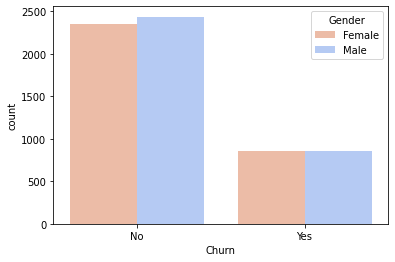

In [127]:
sns.countplot(x='Churn',data=df_train,hue='Gender',palette="coolwarm_r")

From the above graph, we can see that gender is not a contributing factor for customer churn in this data set as the numbers of both the genders, that have or haven’t churned, are almost the same.

<Axes: xlabel='Churn', ylabel='count'>

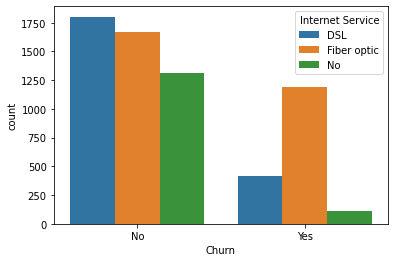

In [128]:
sns.countplot(x='Churn',data=df_train, hue='Internet Service')

We can see that people using Fiber-optic services have a higher churn percentage. This shows that the company needs to improve their Fiber-optic service

<Axes: xlabel='Tech Support', ylabel='count'>

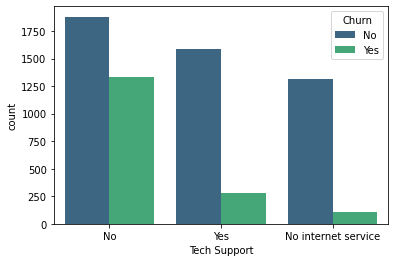

In [129]:
sns.countplot(x='Tech Support',data=df_train, hue='Churn',palette='viridis')

[Text(0.5, 0, 'Tenure in Months'), Text(0, 0.5, 'Count')]

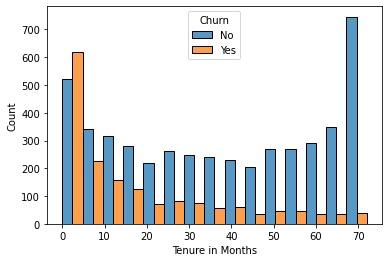

In [130]:
ax = sns.histplot(x = 'Tenure', hue = 'Churn', data = df_train, multiple='dodge')
ax.set(xlabel="Tenure in Months", ylabel = "Count")

The churn amount is higher in the initial 5 months, which is usually the
time when the new customers try out the service and decide whether to
continue or cancel. This pretty much can be attributed to the
uncertainty in the customer’s mind.

<Axes: xlabel='Monthly Charges', ylabel='Count'>

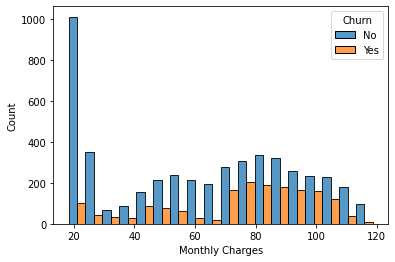

In [131]:
sns.histplot(x='Monthly Charges',hue='Churn',data=df_train ,multiple='dodge')

We cannot see a definite pattern in this, but we can conclude that those who have monthly charges as high as 100 dollars have chosen not to churn. This indicates that the company has done well to retain high paying customers.

In [132]:
numerical_cols = df_train.select_dtypes(include='number').columns.tolist() # column names of the selected numerical columns as a list.
print("Numerical columns:", numerical_cols) #it gives the list of all the numerical columns

Numerical columns: ['Senior Citizen', 'Tenure', 'Monthly Charges', 'Total Charges']


In [133]:
# assuming 'df' is the pandas DataFrame containing the data
numerical_cols = ['Senior Citizen', 'Tenure', 'Monthly Charges', 'Total Charges']

unique_counts = df_train[numerical_cols].nunique() # number of unique values in each column
print(unique_counts)

Senior Citizen        2
Tenure               73
Monthly Charges    1554
Total Charges      6046
dtype: int64


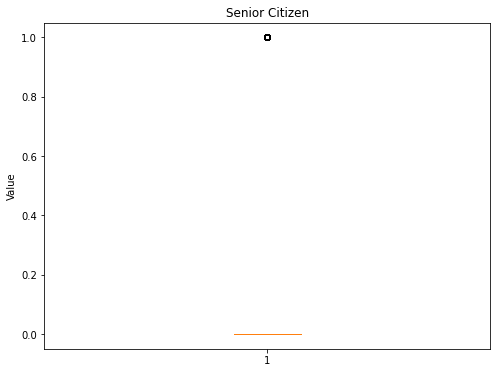

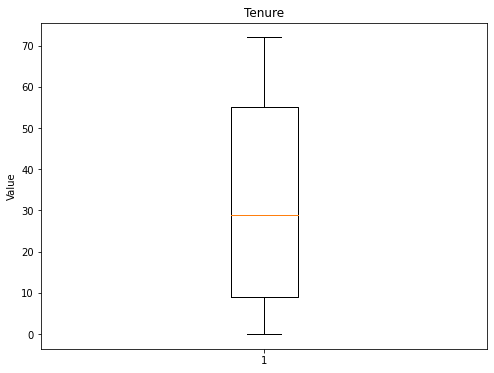

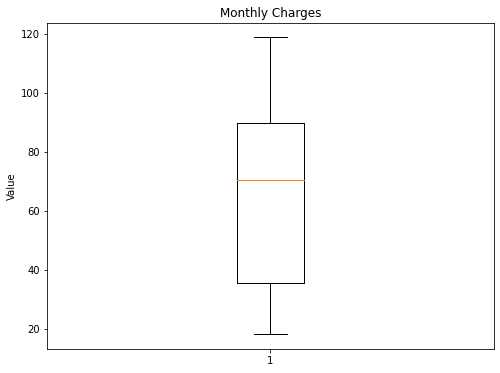

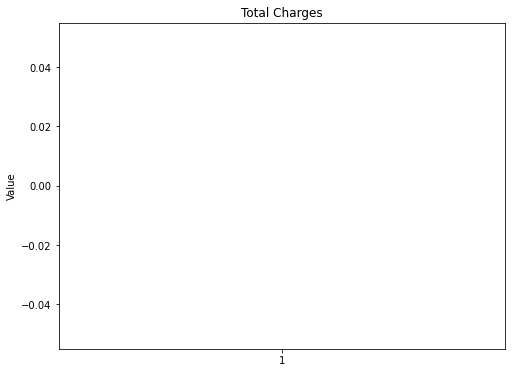

In [134]:
# Create box plots for each numerical column
for col in numerical_cols: ## represent a boxplot for every numerical column in the dataset.
    plt.figure(figsize=(8, 6)) 
    plt.boxplot(df_train[col])
    plt.title(col)
    plt.ylabel('Value')
    plt.show()

Senior Citizen     0
Tenure             0
Monthly Charges    0
Total Charges      0
dtype: int64


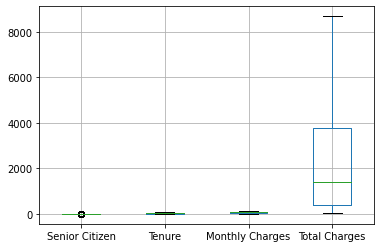

In [135]:
# Create a box plot for each numeric column
df_train.boxplot(column=list(df_train.select_dtypes(include='number').columns)) #creates a list of the numerical column names

# Calculate z-scores for all numerical variables
#selecting columns that are either float64 or int64 then apply the lamda function
# we are subtracting the mean and dividing by the standard deviation of each column.
z_scores = df_train.select_dtypes(include=['float64', 'int64']).apply(lambda x: (x - x.mean()) / x.std())


# Identify outliers based on z-scores greater than 3 or less than -3
outliers = (z_scores > 3) | (z_scores < -3) 

# Print the number of outliers for each variable
print(outliers.sum())

In [136]:
#Removing missing values 
df_train.dropna(inplace = True)
#Remove customer IDs from the data set
df2 = df_train.iloc[:,1:] #select the all rows and we want to select columns starting from the second column
#Convertin the predictor variable in a binary numeric variable
#selects the 'Churn' column that we want to replace 'yes'specifies the replacement value as the integer 1
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)

#Let's convert all the categorical variables into dummy variables
df_train_dummies = pd.get_dummies(df2)
df_train_dummies.head()

Senior Citizen  Tenure  Monthly Charges  Total Charges  Churn  \
0               0       1            29.85          29.85      0   
1               0      34            56.95        1889.50      0   
2               0       2            53.85         108.15      1   
3               0      45            42.30        1840.75      0   
4               0       2            70.70         151.65      1   

   Gender_Female  Gender_Male  Partner_No  Partner_Yes  Dependents_No  ...  \
0              1            0           0            1              1  ...   
1              0            1           1            0              1  ...   
2              0            1           1            0              1  ...   
3              0            1           1            0              1  ...   
4              1            0           1            0              1  ...   

   Streaming Movies_Yes  Contract_Month-to-month  Contract_One year  \
0                     0                        1                  0   
1                     0                        0                  1   
2                     0                        1                  0   
3                     0                        0                  1   
4                     0                        1                  0   

   Contract_Two year  Paperless Billing_No  Paperless Billing_Yes  \
0                  0                     0                      1   
1                  0                     1                      0   
2                  0                     0                      1   
3                  0                     1                      0   
4                  0                     0                      1   

   Payment Method_Bank transfer (automatic)  \
0                                         0   
1                                         0   
2                                         0   
3                                         1   
4                                         0   

   Payment Method_Credit card (automatic)  Payment Method_Electronic check  \
0                                       0                                1   
1                                       0                                0   
2                                       0                                0   
3                                       0                                0   
4                                       0                                1   

   Payment Method_Mailed check  
0                            0  
1                            1  
2                            1  
3                            0  
4                            0  

[5 rows x 46 columns]

<Axes: >

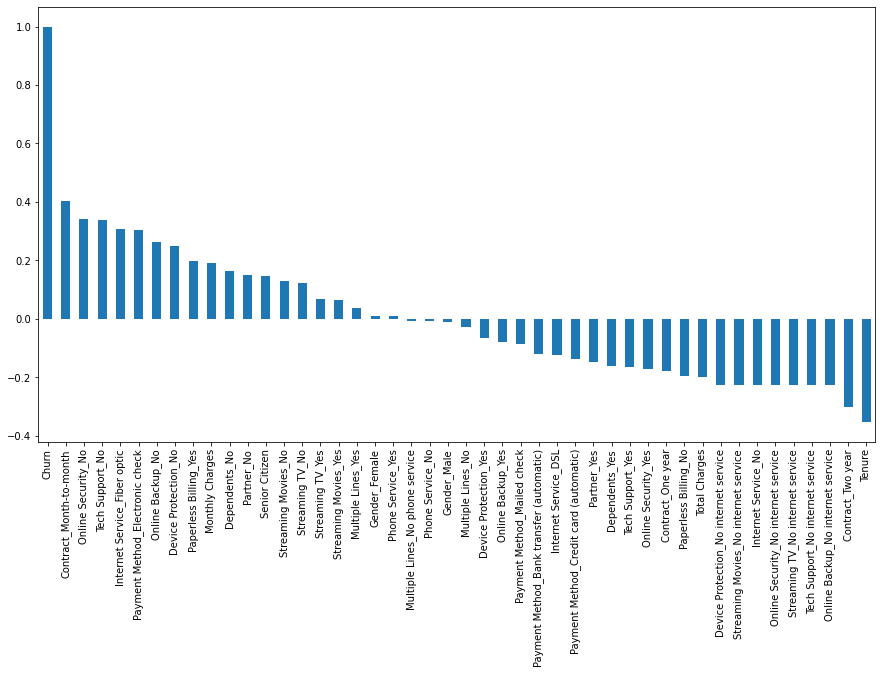

In [137]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
df_train_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

Text(0.5, 1.0, '% of Senior Citizens')

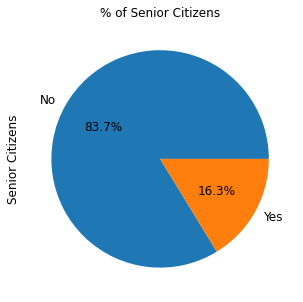

In [138]:
#counts the number of instances of each unique value in the "Senior Citizen" column
ax = (df_train['Senior Citizen'].value_counts() * 100.0 / len(df_train))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12)

3. **Partner and dependent status**  - About 50% of the customers have a partner, while only 30% of the total customers have dependents. 

In [139]:
df_train.columns.values

array(['CustomerID', 'Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'Tenure', 'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection',
       'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract',
       'Paperless Billing', 'Payment Method', 'Monthly Charges',
       'Total Charges', 'Churn'], dtype=object)

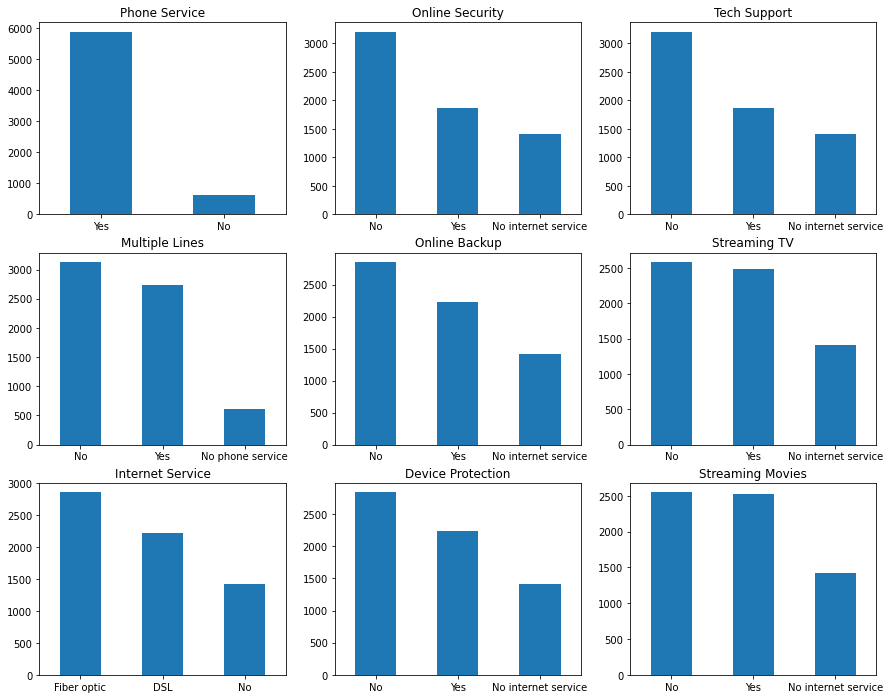

In [140]:
services = ['Phone Service','Multiple Lines','Internet Service','Online Security',
           'Online Backup','Device Protection','Tech Support','Streaming TV','Streaming Movies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = df_train[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)
        
    elif i >=3 and i < 6:
        ax = df_train[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)
        
    elif i < 9:
        ax = df_train[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
    ax.set_title(item)

### D.) Now let's take a quick look at the relation between monthly and total charges

We will observe that the total charges increases as the monthly bill for a customer increases.

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='Monthly Charges', ylabel='Total Charges'>

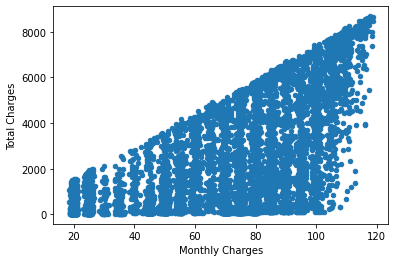

In [141]:
df_train[['Monthly Charges', 'Total Charges']].plot.scatter(x = 'Monthly Charges',
                                                              y='Total Charges')

### E.) Finally, let's take a look at out predictor variable (Churn) and understand its interaction with other important variables as was found out in the correlation plot. 

1. Lets first look at the churn rate in our data

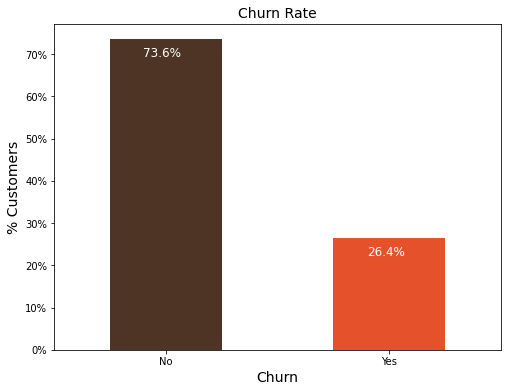

In [142]:
colors = ['#4D3425','#E4512B']
ax = (df_train['Churn'].value_counts()*100.0 /len(df_train)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors,
                                                                         figsize = (8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Churn',size = 14)
ax.set_title('Churn Rate', size = 14)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%', fontsize=12,
            color='white')


## After going through the above EDA we will develop some predictive models and compare them.


In [143]:
# We will use the data frame where we had created dummy variables
y = df_train_dummies['Churn'].values
X = df_train_dummies.drop(columns = ['Churn'])

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [144]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
print('X_train :', X_train.shape)
print('X_test :', X_test.shape)
print('y_train :', y_train.shape)
print('y_test :', y_test.shape)

X_train : (5192, 45)
X_test : (1298, 45)
y_train : (5192,)
y_test : (1298,)


In [145]:
X_test.shape

(1298, 45)

In [146]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

model = GaussianNB()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))


0.6976117103235747
0.7026194144838213


In [147]:
# We will use the data frame where we had created dummy variables
X = df_train_dummies.drop(columns = ['Churn'])
y = df_train_dummies['Churn'].values

In [148]:
# shuffle and split the data
data = list(zip(X.values, y))
np.random.shuffle(data)

split = int(0.8 * len(data))
train_data = data[:split]
test_data = data[split:]

X_train = [d[0] for d in train_data]
y_train = [d[1] for d in train_data]
X_test = [d[0] for d in test_data]
y_test = [d[1] for d in test_data]

In [149]:
X_train = np.array(X_train)
y_train = np.array(y_train)
n = X_train.shape[1]
X_train = X_train.reshape(-1, n)
y_train = y_train.reshape(-1,)

In [150]:
class GaussianNaiveBayes:
    def __init__(self):
        self.classes = None
        self.class_priors = None
        self.mean = None
        self.var = None

    def fit(self, X, y):
        self.classes = np.unique(y)
        self.class_priors = np.zeros(len(self.classes))
        self.mean = np.zeros((len(self.classes), X.shape[1]))
        self.var = np.zeros((len(self.classes), X.shape[1]))

        # calculate class priors
        for i, c in enumerate(self.classes):
            self.class_priors[i] = np.sum(y == c) / float(len(y))

        # calculate mean and variance of each feature for each class
        for i, c in enumerate(self.classes):
            X_c = X[y == c]
            self.mean[i] = np.mean(X_c, axis=0)
            self.var[i] = np.var(X_c, axis=0)

    def predict(self, X):
        y_pred = np.zeros(X.shape[0])

        for i, x in enumerate(X):
            posteriors = []

            # calculate posterior probability of each class
            for j, c in enumerate(self.classes):
                prior = np.log(self.class_priors[j])
                posterior = np.sum(np.log(self.gaussian_density(x, self.mean[j], self.var[j])))
                posterior = prior + posterior
                posteriors.append(posterior)

            # assign instance to the class with the highest posterior probability
            y_pred[i] = self.classes[np.argmax(posteriors)]

        return y_pred

    def gaussian_density(self, x, mean, var):
        eps = 1e-4
        coef = 1.0 / np.sqrt(2.0 * np.pi * var + eps)
        exponent = -(np.power(x - mean, 2) / (2.0 * var + eps))
        return coef * np.exp(exponent)


In [151]:
model = GaussianNaiveBayes()
model.fit(X_train, y_train)

# Convert X_train and X_test to NumPy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Compute accuracy scores
print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))

0.6962634822804314
0.7126348228043143


In [152]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

# Create a Naive Bayes classifier
nb_classifier = GaussianNB()

# Define the parameter grid
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]
}

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(nb_classifier, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best parameter and the corresponding score
print("Best Parameter: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)


Best Parameter:  {'var_smoothing': 0.0001}
Best Score:  0.7896734484210214
